### 1번

다음 관계를 증명하고, R 프로그램의 난수를 이용하여 히스토그램을 그리고 이를 바탕으로 관계가 성립함을 보이시오.

(1) X ~ Bin(n, p) 의 확률표본일 때, n이 커지면서 <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">

#### 풀이 1-1) 관계 증명하기
- 자유도가 1인 카이제곱분포는 평균이 0이고, 표준편차가 1인 표준정규분포를 Z라고 할 때, Z의 제곱의 분포이다.
- X가 자유도 n, 성공확률 p인 이항분포일 때, X의 기댓값 E(X)=np, 분산 Var(X)=np(1-p)이다.
- <img src="https://latex.codecogs.com/svg.image?Z=\frac{X-np}{\sqrt{np(1-p)}}"> 이라고 하면, X의 평균이 np이고, 분산이 np(1-p) 일 때, Z의 평균은 0, 분산은 1이 된다.
- Z의 제곱을 구하면 <img src="https://latex.codecogs.com/svg.image?Z^2=\frac{(X-\mu)^2}{\sigma^2}=\frac{(X-np)^2}{np(1-p)}"> 이다.
- 그리고 n의 값이 큰 경우 중심극한정리에 따라서 이항분포는 정규분포에 근사하게 된다.
- 따라서, <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">이 성립한다.

#### 풀이 1-2) R 프로그램으로 히스토그램 그리기

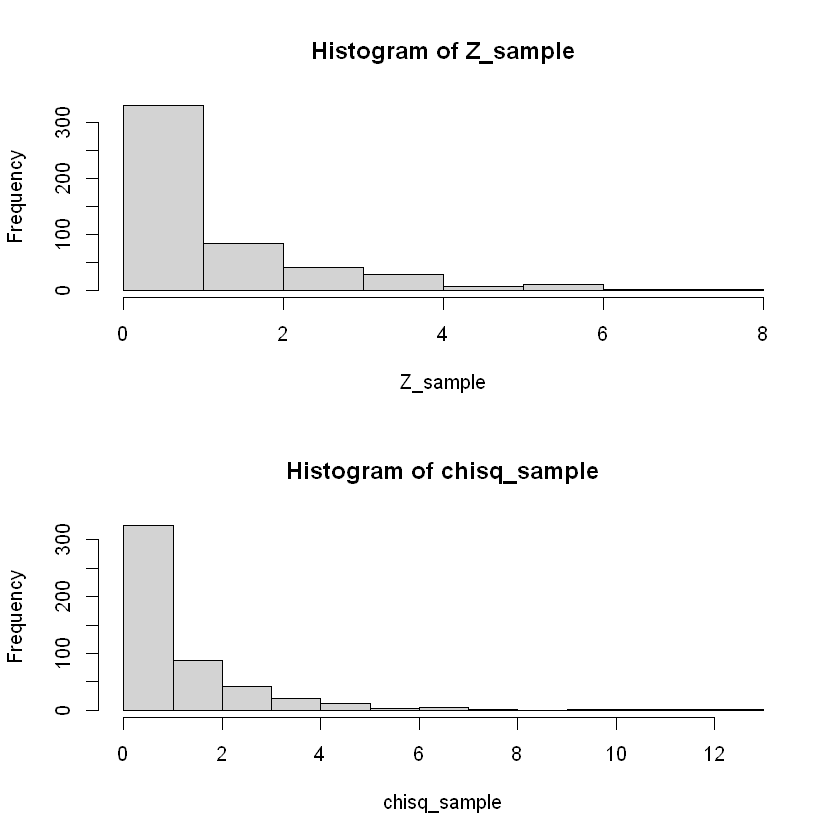

In [27]:
par(mfrow=c(2,1))

# 이항분포 B(n,p)의 히스토그램 그리기
sample_size = 500
n = 100000
p = 0.5

X_sample = rbinom(sample_size, size=n, prob=p)
Z_sample <- (X_sample - n*p)^2 / (n*p*(1-p))
hist(Z_sample)

# 자유도가 1인 카이제곱분포의 히스토그램 그리기
chisq_sample = rchisq(sample_size, df=1)
hist(chisq_sample)

두 그래프가 거의 동일한 형태이므로 <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">이 성립한다고 할 수 있다.

(2) <img src="https://latex.codecogs.com/svg.image?X_1,\cdots,X_n\sim&space;Uniform(0,1)"> 의 확률표본이고, <img src="https://latex.codecogs.com/svg.image?X_{(1)}\leq&space;X_{(2)}\leq\cdots\leq&space;X_{(n)}"> 를 순서통계량이라고 할 때, n이 커지면서 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)">

#### 풀이 2-1) 관계 증명하기

- 균등분포(0,1)의 확률밀도함수는 <img src="https://latex.codecogs.com/svg.image?f(x)=\begin{cases}1,&0\leq&space;x\leq&space;1\\0,&x<0\;\;or\;\;x>1\end{cases}"> 이고,
- 누적분포함수는 <img src="https://latex.codecogs.com/svg.image?F(x)=P(X\leq&space;x)=\int_{0}^{x}1dt=x"> 이다.
- 그리고 <img src="https://latex.codecogs.com/svg.image?X_{(1)}\leq&space;X_{(2)}\leq\cdots\leq&space;X_{(n)}"> 이므로, <img src="https://latex.codecogs.com/svg.image?F_{X_{(n)}}(x)=P(X_{(n)}\leq&space;x)=x^n">이다. (0≤x≤1)

- <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})">의 누적분포함수는 다음과 같이  표현할 수 있다.
  - <img src="https://latex.codecogs.com/svg.image?F_{n(1-X_{(n)})}(y)=P(n(1-X_{(n)})\leq&space;y)">
  - 여기서 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\leq&space;y\Leftrightarrow&space;X_{(n)}\geq&space;1-\frac{y}{n}">을 이용하면,
  <img src="https://latex.codecogs.com/svg.image?F_{n(1-X_{(n)})}(y)=P(n(1-X_{(n)})\leq&space;y)">
  <img src="https://latex.codecogs.com/svg.image?=P(X_{(n)}\geq&space;1-\frac{y}{n})=1-P(X_{(n)}<1-\frac{y}{n})=1-F_{X_{(n)}}(1-\frac{y}{n})">
  <img src="https://latex.codecogs.com/svg.image?=1-(1-\frac{y}{n})^n">

- <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})">의 누적분포함수를 미분하면 확률밀도함수를 구할 수 있다.
  - <img src="https://latex.codecogs.com/svg.image?f_{n(1-X{(n)})}(y)=F_{n(1-X{(n)})}(y)\frac{d}{dy}=(1-(1-\frac{y}{n})^n)\frac{d}{dy}">
  <img src="https://latex.codecogs.com/svg.image?=(1-\frac{y}{n})^{n-1}">

- n이 충분히 커지면 다음과 같은 식이 성립한다.
  - <img src="https://latex.codecogs.com/svg.image?\lim_{n\to\infty}f_{n(1-X{(n)})}(y)=\lim_{n\to\infty}(1-\frac{y}{n})^{n-1}=e^{-y}">

- 지수분포 Exp(λ)의 확률밀도함수는 <img src="https://latex.codecogs.com/svg.image?f(x)=\lambda&space;e^{-\lambda&space;x}">인데, λ=1을 대입하면 두 식이 같아진다.
- 따라서, n이 커지면 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)"> 임을 확인할 수 있다.

#### 풀이 2-2) R 프로그램으로 히스토그램 그리기


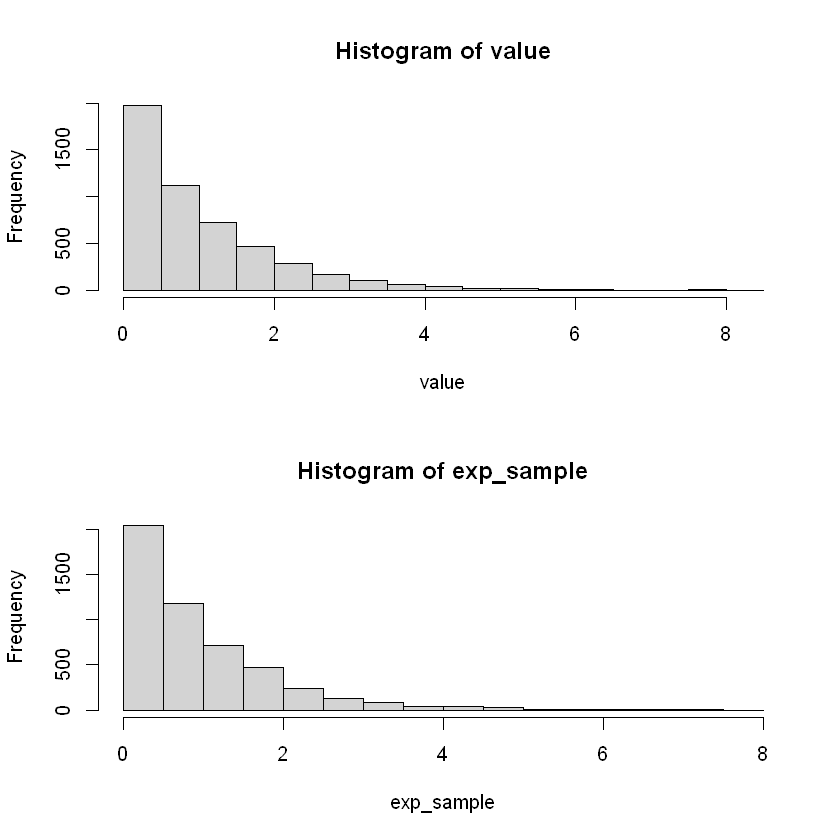

In [47]:
par(mfrow=c(2,1))
n=5000
value = numeric(n)

for(i in 1:n) {
    uni_sample = runif(n)
    max_value = max(uni_sample)
    value[i] = n*(1-max_value)
}

hist(value)

exp_sample = rexp(n, rate=1)
hist(exp_sample)

두 그래프가 동일한 형태이므로 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)"> 임을 확인할 수 있다.

### 문제2

<img src="https://latex.codecogs.com/svg.image?X_i\sim&space;N(\mu,\sigma^2)">의 확률표본일 때 다음 관계 중 (1)~(3)을 증명하고, (1), (2), (4)에 대해 R 프로그램의 난수(n=30을 가정)를 이용하여 히스토그램을 그리고 이를 바탕으로 관계가 성립함을 보이시오.

(1) <img src="https://latex.codecogs.com/svg.image?\bar{X}\sim&space;N(\mu,\frac{\sigma^2}{n})"> <br>
(2) <img src="https://latex.codecogs.com/svg.image?\frac{(n-1)S^2}{\sigma^2}\sim\chi^2(n-1)"> <br>
(3) <img src="https://latex.codecogs.com/svg.image?\bar{X}">와 <img src="https://latex.codecogs.com/svg.image?S^2">은 서로 독립 <br>
(4) <img src="https://latex.codecogs.com/svg.image?\frac{\bar{X}-\mu}{S/\sqrt{n}}\sim&space;t(n-1)"> 

#### 풀이 (1)

- Xi 확률변수 합의 분포는 적률생성함수를 곱해서 구할 수 있고, 평균을 구하려면 t를 n으로 나누면 된다.

<img src="https://latex.codecogs.com/svg.image?M_{\bar{X}}(t)=(M_X(t/n))^n=(exp(\mu\cdot\frac{t}{n}&plus;\frac{1}{2}\sigma^2(\frac{t}{n})^2))^n">\
<img src="https://latex.codecogs.com/svg.image?=exp(\mu\cdot\frac{t}{n}\cdot&space;n&plus;\frac{1}{2}\sigma^2(\frac{t}{n})^2\cdot&space;n)">
<img src="https://latex.codecogs.com/svg.image?=exp(\mu\cdot&space;t&plus;\frac{1}{2}\cdot\frac{\sigma^2}{n}\cdot&space;t^2)\sim&space;N(\mu,\frac{\sigma^2}{n})">

- 적률생성함수의 유일성에 따라 <img src="https://latex.codecogs.com/svg.image?\bar{X}\sim&space;N(\mu,\frac{\sigma^2}{n})"> 이 성립함이 증명된다.



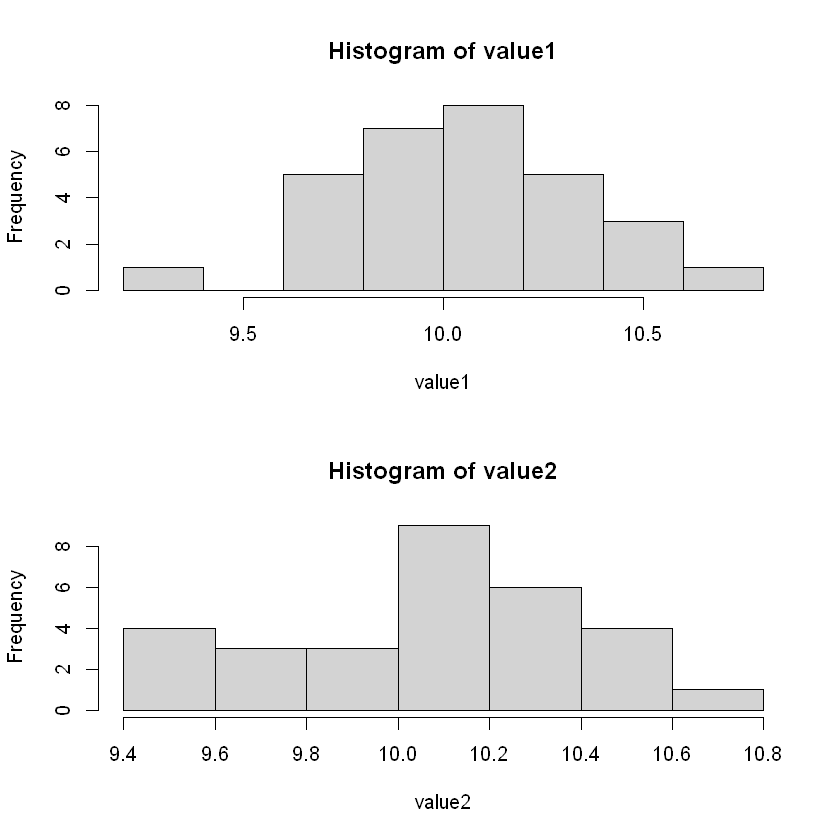

In [107]:
par(mfrow=c(2,1))
mu=10
sigma=2

n=30
value1 = numeric(n)

for(i in 1:n) {
    x_sample = rnorm(30, mean=mu, sd=sigma)
    x_mean = mean(x_sample)
    value1[i] = x_mean
}

hist(value1)

value2 = rnorm(n, mean=mu, sd=sigma/sqrt(n))
hist(value2)

#### 풀이 (2)

- 표본분산의 분포를 나타내는 식은 <img src="https://latex.codecogs.com/svg.image?&plus;\bar{X}-\bar{X}">를 추가해서 제곱하고, 항을 정리하여 다음과 같이 나타낼 수 있다.

<img src="https://latex.codecogs.com/svg.image?\sum_{i=1}^{n}\left(\frac{X_i-\mu}{\sigma}\right)^2=\sum_{i=1}^{n}\left(\frac{X_i-\bar{X}}{\sigma}\right)^2&plus;\left(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\right)">

- <img src="https://latex.codecogs.com/svg.image?\frac{(X_i-\mu)^2}{\sigma^2}">의 분포는 <img src="https://latex.codecogs.com/svg.image?\chi^2(1)"> 인데, n개를 합해야 하므로 첫번째 항은 <img src="https://latex.codecogs.com/svg.image?\chi^2(n)"> 분포로 나타낼 수 있다.

- <img src="https://latex.codecogs.com/svg.image?\frac{(\bar{X}-\mu)^2}{\sigma^2/n}">은 X의 표본평균의 분포인데, Z로 정규화한 분포이다. Z의 분포는 <img src="https://latex.codecogs.com/svg.image?N(0,1)">을 따르고, 따라서 <img src="https://latex.codecogs.com/svg.image?\chi^2(1)"> 분포로 표현할 수 있다.

- 카이제곱의 가법성에 따라서 <img src="https://latex.codecogs.com/svg.image?\sum_{i=1}^{n}\left(\frac{X_i-\bar{X}}{\sigma}\right)^2=\chi^2(n)-\chi^2(1)=\chi^2(n-1)"> 이다.

- 그런데, <img src="https://latex.codecogs.com/svg.image?\sum_{i=1}^{n}\left(\frac{X_i-\bar{X}}{\sigma}\right)^2=\frac{(n-1)\cdot\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2}{\sigma^2}=\frac{(n-1)S^2}{\sigma^2}"> 이다.

- 따라서, <img src="https://latex.codecogs.com/svg.image?\frac{(n-1)S^2}{\sigma^2}\sim\chi^2(n-1)"> 이 성립한다.

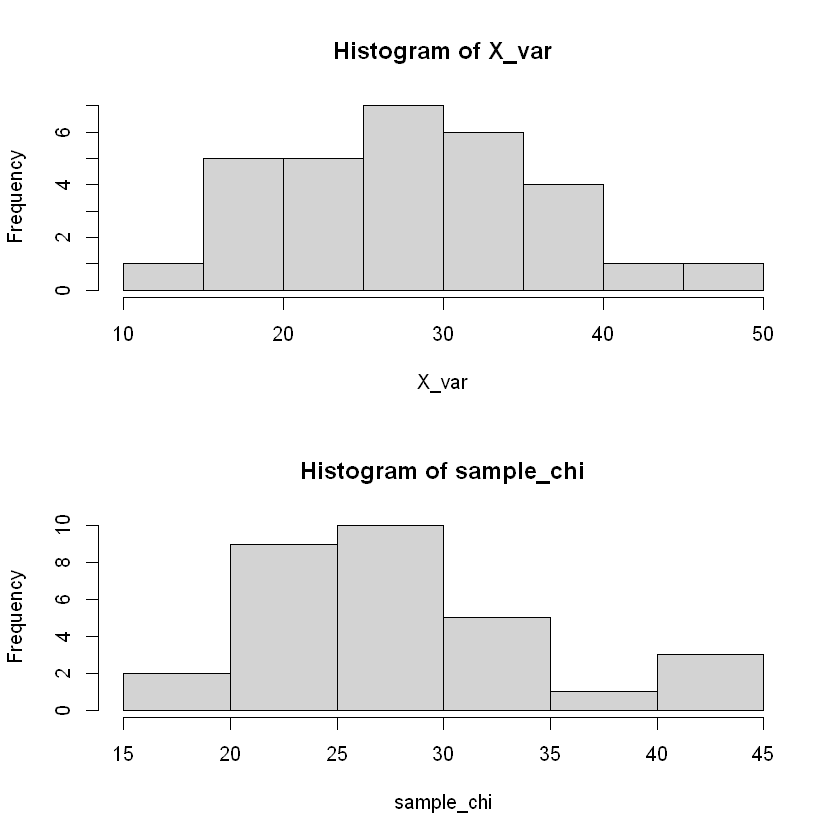

In [160]:
par(mfrow=c(2,1))

n=30
mu=0
sigma=2

X_var = numeric(n)

for(i in 1:30) {
    X_sample = rnorm(n, mean=mu, sd=sigma)
    X_var[i] = var(X_sample)
}

X_var = (X_var*(n-1))/(sigma^2)
hist(X_var)

sample_chi = rchisq(30, df=n-1)
hist(sample_chi)

#### 풀이 (3)

표본평균과 표본분산의 공분산이 0이면 독립이라고 할 수 있다.

- <img src="https://latex.codecogs.com/svg.image?Cov(\bar{X},S^2)=E((\bar{X}-E(\bar{X})(S^2-E(S^2))=0">

- 그런데, 표본평균의 기댓값은 모집단의 평균이고, 표본분산의 기댓값은 모집단의 분산이다. 따라서 식을 다음과 같이 표현할 수 있다.

- <img src="https://latex.codecogs.com/svg.image?Cov(\bar{X},S^2)=E[(\bar{X}-\mu)(S^2-\sigma^2)]=0">

- 표본평균은 모집단의 평균에 수렴하므로 <img src="https://latex.codecogs.com/svg.image?\bar{X}-\mu">는 0으로 수렴하고, 표본분산은 모집단의 분산에 수렴하므로 <img src="https://latex.codecogs.com/svg.image?S^2-\sigma^2">도 0으로 수렴한다.

- 따라서, 표본평균과 표본분산의 공분산은 0이 되며, 두 변수는 독립임을 확인할 수 있다.


#### 풀이 (4)

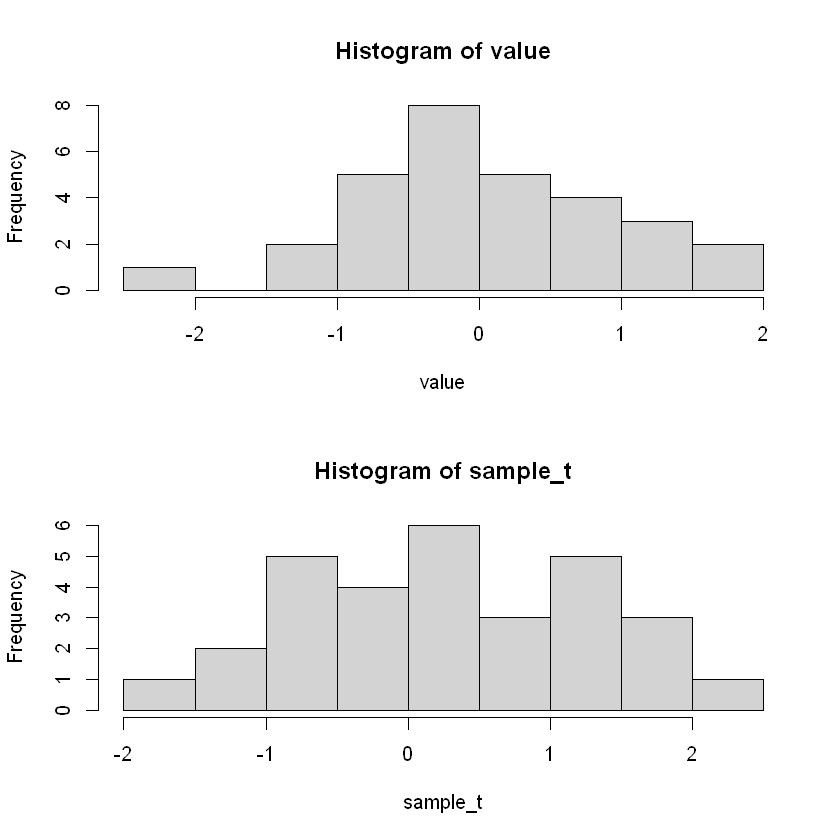

In [172]:
par(mfrow=c(2,1))

n=30
mu=0
sigma=2

value = numeric(n)

for(i in 1:30) {
    X_sample = rnorm(n, mean=mu, sd=sigma)
    value[i] = (mean(X_sample)-mu)/(sd(X_sample)/sqrt(n))
}

hist(value)

sample_t = rt(30, df=n-1)
hist(sample_t)

### 3. Xi ~ Exp(2) 의 확률표본일 때 다음 물음에 답하시오.

(1) <img src="https://latex.codecogs.com/svg.image?\bar{X}">가 <img src="https://latex.codecogs.com/svg.image?E(X_1)">으로 확률적으로 수렴함을 증명하고, n=10, 100, 1000, 10000 일 떄의 값과 <img src="https://latex.codecogs.com/svg.image?E(X_1)">의 값을 비교하시오.

<img src="https://latex.codecogs.com/svg.image?E(X_i)=\mu=\frac{1}{\lambda},\;\;Var(X_i)=\sigma^2=\frac{1}{\lambda^2}"><br>

<img src="https://latex.codecogs.com/svg.image?\bar{X_n}=\frac{1}{n}\sum_{i=1}^{n}X_i,\;\;\;E(\bar{X_n})=\mu,\;\;\;Var(\bar{X_n})=\frac{\sigma^2}{n}">

여기서 체비셰프 부등식을 사용하면 다음과 같이 표현할 수 있다.

<img src="https://latex.codecogs.com/svg.image?P(|\bar{X_n}-\mu|<\epsilon)\\=P((\bar{X_n}-\mu)^2<\epsilon^2)\geq&space;1-\frac{E((\bar{X_n}-\mu)^2)}{\epsilon^2}=1-\frac{Var(\bar{X_n})}{\epsilon^2}=1-\frac{\sigma^2}{n\epsilon^2}">

따라서, 표본평균 X는 표본분포의 기댓값인 1/λ, 즉 1/2에 수렴한다.

In [185]:
lambda=2

x_10 = rexp(10, rate=lambda)
x_100 = rexp(100, rate=lambda)
x_1000 = rexp(1000, rate=lambda)
x_10000 = rexp(10000, rate=lambda)

print(mean(x_10))
print(mean(x_100))
print(mean(x_1000))
print(mean(x_10000))

[1] 0.3123301
[1] 0.4405264
[1] 0.5188108
[1] 0.4953194


n = 10, 100, 1000, 10000 일때의 값은 0.5 로 수렴한다.

(2) <img src="https://latex.codecogs.com/svg.image?\bar{X}">의 분포를 n=2, 10, 50, 100 의 히스토그램을 그리고 중심극한정리로 그 의미를 정리하시오.

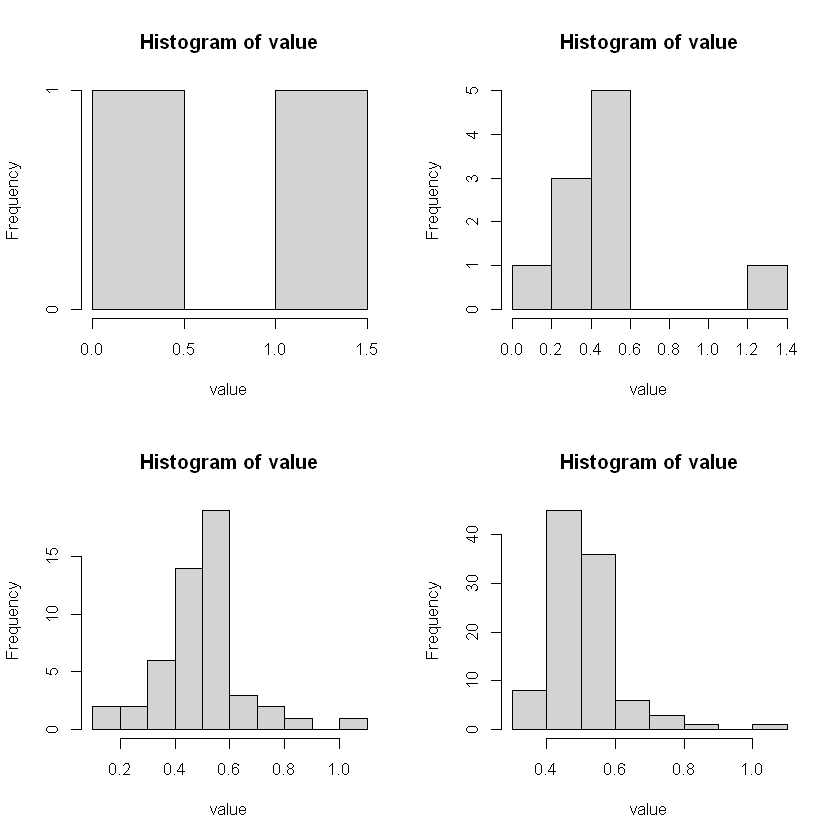

In [201]:
par(mfrow=c(2,2))

n=c(2, 10, 50, 100)

for(i in n) {
    value = numeric(i)
    for(j in 1:i) {
        x_data = rexp(j, rate=2)
        value[j]=mean(x_data)
    }
    hist(value)
}

중심극한정리로 히스토그램의 의미를 정리하면 다음과 같다.

1. 표본의 크기가 커질수록 표본평균은 모평균에 근사한다. 즉, 표본을 늘릴수록 모평균의 값을 보다 정확하게 예측할 수 있다.
2. 다양한 확률변수라 할지라도 그 평균을 반복적으로 구한다면, 평균의 분포는 정규분포를 따른다.
